In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [34]:

np.random.seed(42)

# Create nonlinear and noisy features
n_samples = 1000
X1 = np.random.uniform(-1,1, n_samples)
X2 = np.random.uniform(-2,2, n_samples)
X3 = np.random.normal(0, 1, n_samples)
X4 = np.random.normal(0, 1, n_samples)

# Target with non-linear relationship and noise
y = 2 * np.sin(X1) + 2 * X2**2 - 2 * X3 + 1.5 * X4 + np.random.normal(0, 3, n_samples)

# Assemble dataset
df = pd.DataFrame({
    'X1_sin': X1,
    'X2_squared': X2,
    'X3_linear': X3,
    'X4_noise': X4,
    'target': y
})

# Split for modeling
x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

df.head()


,X1_sin,X2_squared,X3_linear,X4_noise,target
0,-0.250920,-1.259468,-0.877983,1.870965,8.278474
1,0.901429,0.167604,-0.826880,0.389614,11.397462
2,0.463988,1.491783,-0.226479,-0.868293,-1.023844
3,0.197317,0.928900,0.367366,0.534629,2.088158
4,-0.687963,1.226245,0.913585,-2.635748,-2.121740


In [35]:
df.head(4)

,X1_sin,X2_squared,X3_linear,X4_noise,target
0,-0.250920,-1.259468,-0.877983,1.870965,8.278474
1,0.901429,0.167604,-0.826880,0.389614,11.397462
2,0.463988,1.491783,-0.226479,-0.868293,-1.023844
3,0.197317,0.928900,0.367366,0.534629,2.088158


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape

(800, 4)

In [ ]:
# fiting first simple model

lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

r2_score1 = r2_score(y_test,y_pred1)


In [ ]:
print(
    'r2_score : ',r2_score1   # too low r2 score
)

r2_score :  0.31605344112403744


In [40]:
x_test.shape

(200, 4)

In [41]:
adj_r2_score = 1 - ((1 - r2_score1)*(200 - 1))/(200 - 4 - 1)
print(adj_r2_score)

0.3020237681214536


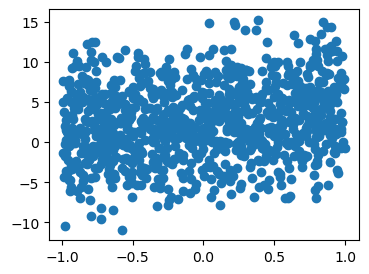

In [ ]:
# check Assumptions

# 1. Linearity   -------------------------> sort of non-linear
plt.figure(figsize=(4,3))
plt.scatter(x.iloc[:,0],y)

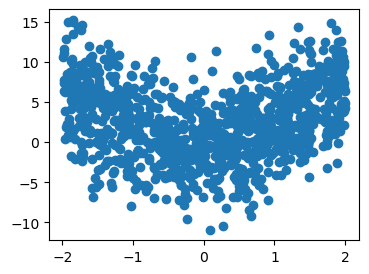

In [44]:
plt.figure(figsize=(4,3))
plt.scatter(x.iloc[:,1],y)

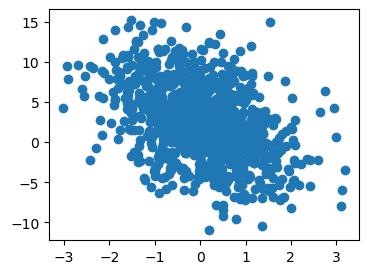

In [45]:
plt.figure(figsize=(4,3))
plt.scatter(x.iloc[:,2],y)

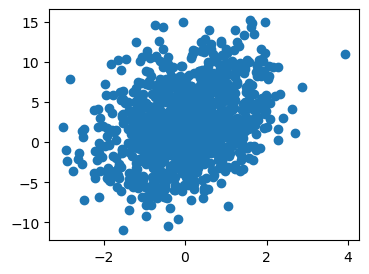

In [46]:
plt.figure(figsize=(4,3))
plt.scatter(x.iloc[:,3],y)

In [49]:
residual1 = y_pred1 - y_test

(array([ 4.,  5., 16., 27., 34., 42., 38., 26.,  7.,  1.]),
 array([-10.14387906,  -8.19783728,  -6.2517955 ,  -4.30575371,
         -2.35971193,  -0.41367015,   1.53237164,   3.47841342,
          5.4244552 ,   7.37049699,   9.31653877]),
 <BarContainer object of 10 artists>)

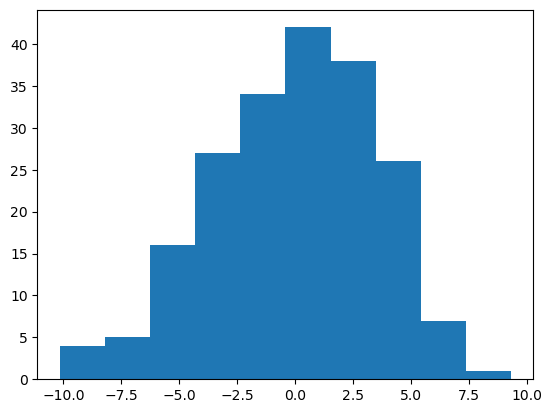

In [ ]:
# 2. normality of residual

plt.hist(residual1)    #  -------> sort of normal

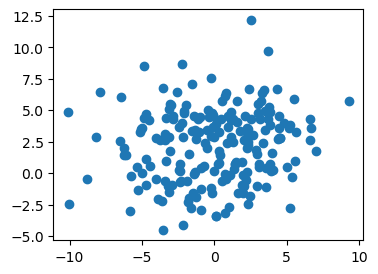

In [56]:
# horoscedicity

plt.figure(figsize=(4,3))
plt.scatter(residual1,y_pred1)  #  ---------> random

In [53]:
# multicolinairity

corr_matrix = x.corr()

In [ ]:
corr_matrix  # ---------> no multicolinarity

,X1_sin,X2_squared,X3_linear,X4_noise
X1_sin,1.000000,0.029310,-0.010096,-0.036746
X2_squared,0.029310,1.000000,-0.001215,0.050292
X3_linear,-0.010096,-0.001215,1.000000,0.016401
X4_noise,-0.036746,0.050292,0.016401,1.000000


In [55]:
vif = 1/(1-r2_score1)
print(vif)

1.4621025386010538


In [62]:
### so due to first assumption of linearity we clearly see data is non-linear

poly = PolynomialFeatures(degree=2,include_bias=True)

x_train_pl = poly.fit_transform(x_train)
x_test_pl = poly.transform(x_test)

In [63]:
lr = LinearRegression()
lr.fit(x_train_pl,y_train)
y_pred_pl = lr.predict(x_test_pl)
r2_score_pl = r2_score(y_test,y_pred_pl)

print(r2_score_pl)

0.5647841542416183


In [64]:
# DOING Feature selection

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LinearRegression()
sfs = EFS(lr, max_features=4, scoring='r2', cv=5)

In [69]:
model = sfs.fit(x,y)

Features: 15/15

In [70]:
model.best_score_

0.3102424563951809

In [72]:
import statsmodels.api as sm

In [73]:


x_train_trns = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_trns).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     96.21
Date:                Sun, 25 May 2025   Prob (F-statistic):           9.13e-67
Time:                        19:32:54   Log-Likelihood:                -2212.8
No. Observations:                 800   AIC:                             4436.
Df Residuals:                     795   BIC:                             4459.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5508      0.137     18.675      0.0

In [75]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(
    max_iter=500,
    learning_rate='constant',
    eta0=0.01,
    early_stopping=True
)

In [76]:
sgd.fit(x_train,y_train)

SGDRegressor(early_stopping=True, learning_rate='constant', max_iter=500)

In [77]:
y_pred_sgd = sgd.predict(x_test)

print('r2 : ',r2_score(y_test,y_pred_sgd))

r2 :  0.2733526140537046


In [84]:
#  hense clearly data is non-linear
# applying transformation


lr = LinearRegression()
y_train_s = np.sqrt(y_train)
y_test_s = np.sqrt(y_test)

lr.fit(x_train,y_train_s)
y_pred1 = lr.predict(x_test)

r2_score1 = r2_score(y_test_s,y_pred1)

print(
    'r2_score : ',r2_score1   # too low r2 score
)

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input y contains NaN.

In [85]:
y_train_s.isna().sum()

233